# ***Training***

In [1]:
# Basic Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [2]:
df=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


# ***Exploratory Data Analysis and Visualization***

In [3]:
df.shape

(41157, 6)

In [4]:
# function to keep only Text and label:
def feature_reduction(df):
    x=df['OriginalTweet']
    y=df['Sentiment']
    df=pd.concat((x,y),axis=1)
    return df

In [5]:
df=feature_reduction(df)
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


# ***NULLs and Cardinality:***

In [6]:
overview=pd.concat([df.isnull().sum(),df.nunique()],axis=1,keys=['Null Counts','Cardinality'])
overview

,Null Counts,Cardinality
OriginalTweet,0,41157
Sentiment,0,5


In [7]:
# function for removing NULL values:
def remove_nulls(df):
    idx=df.loc[df['OriginalTweet'].isnull()].index
    idx2=df.loc[df['Sentiment'].isnull()].index
    df_clean=df.drop(idx)
    df_clean=df.drop(idx2)
    return df_clean

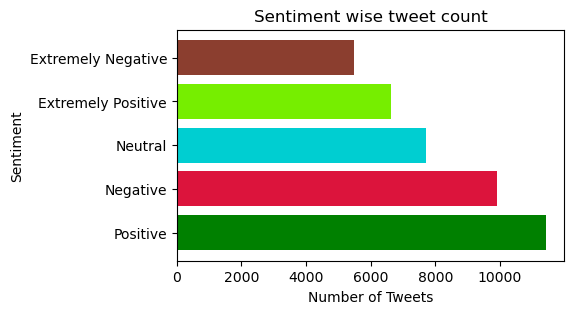

In [8]:
sentiments=df.Sentiment.value_counts()

plt.subplots(figsize=(5,3))
plt.barh(sentiments.index,sentiments.values, color=['green','#DC143C','#00CED1','#76EE00','#8B3E2F'])
plt.title("Sentiment wise tweet count")
plt.ylabel('Sentiment')
plt.xlabel('Number of Tweets')
plt.yticks(sentiments.index)
plt.show()

# ***Textual Preprocessing***
* Hashtag, Mention and URL Removal
* Punctuation removal:
    * Apostrophe
    * Special Characters
    * Numbers
* Formatting Symbols and Escape character removal
* Lowercasing
* Redundant Spaces removal

In [9]:
# function for initial textual preprocessing:
def preprocessing(x):
    import re
    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    return x

In [10]:
df['OriginalTweet']=preprocessing(df['OriginalTweet'])
df

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the outbr...,Extremely Negative
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Extremely Negative
41154,you know it s getting tough when is rationing ...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


# ***Word Cloud***

In [11]:
from wordcloud import WordCloud, STOPWORDS

# function to build sentiment wisewordcloud:
def show_wordcloud(df):
    sentiments=df.Sentiment.value_counts().index.to_list()
    
    stopwords = set(STOPWORDS)
    
    plt.subplots(figsize=(14,14))
    i=1
    for senti in sentiments:
        curr=df['OriginalTweet'].loc[df.Sentiment==senti]
        text=curr.values
        text=' '.join(text)
        
        wordcloud=WordCloud(max_words=200, stopwords=stopwords, background_color='white', max_font_size=50).generate(text)
        
        plt.subplot(3,2,i)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(senti,fontsize=15)
        i+=1

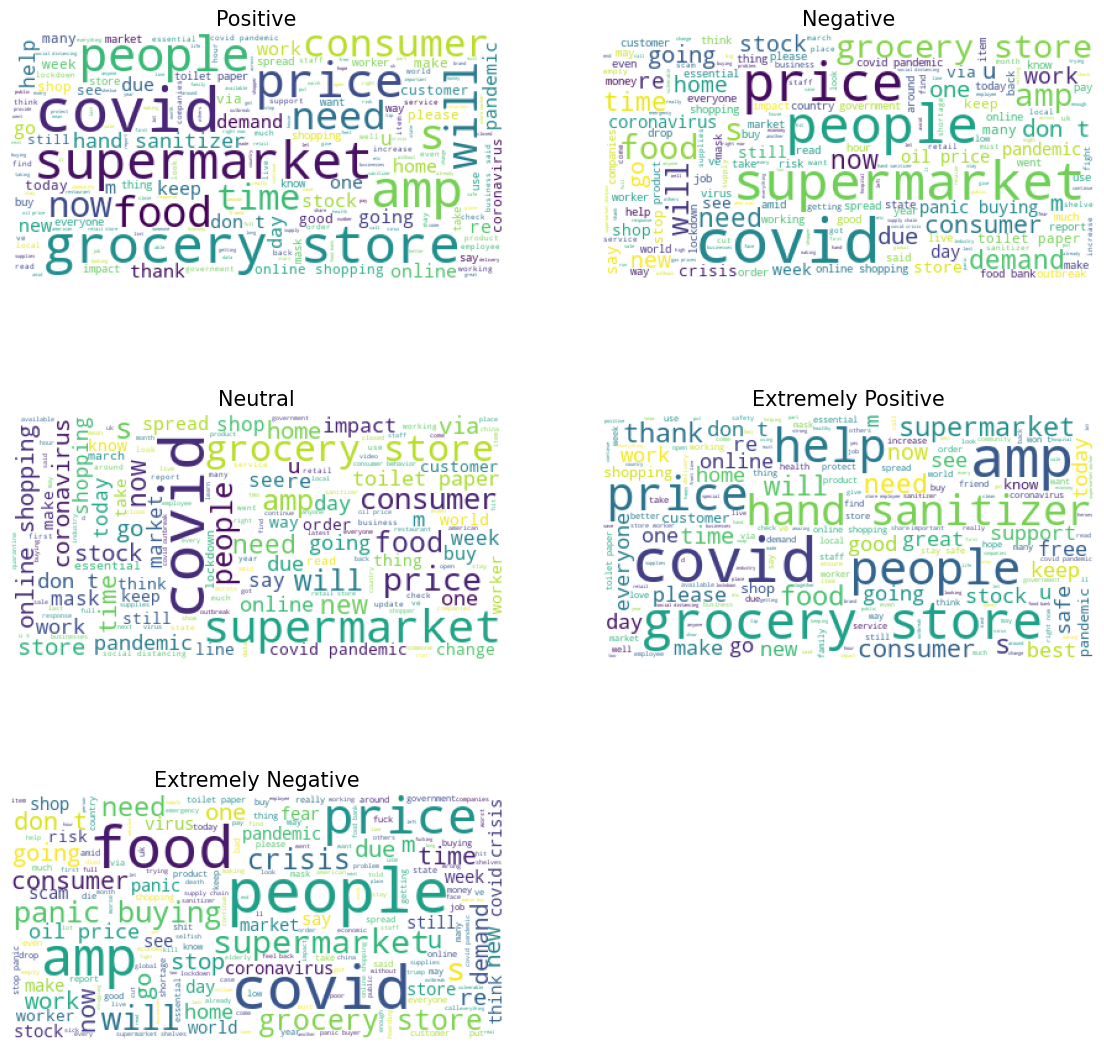

In [12]:
# generating wordclouds:
show_wordcloud(df)

# ***Label Preprocessing***
* Label Reduction (by grouping)
    * (Extremely Negative, Negative) --> negative
    * (Extremely Positive, Positive) --> positive
    * (Neutral) --> neutral
* Label Encoding
    * negative --> -1
    * positive --> 1
    * neutral --> 0

In [13]:
# function for label reduction and encoding:
def label_preprocessing(df):
    lab_dict={
        'Extremely Negative': 'negative',
        'Negative': 'negative',
        'Neutral': 'neutral',
        'Positive': 'positive',
        'Extremely Positive': 'positive'
    }
    df['Sentiment']=df['Sentiment'].map(lab_dict)
    
    encoder={'negative': -1, 'neutral': 0, 'positive': 1}
    df['Sentiment']=df['Sentiment'].map(encoder)
    
    return df

In [14]:
# label preprocessing:
df=label_preprocessing(df)
df

,OriginalTweet,Sentiment
0,and and,0
1,advice talk to your neighbours family to excha...,1
2,coronavirus australia woolworths to give elder...,1
3,my food stock is not the only one which is emp...,1
4,me ready to go at supermarket during the outbr...,-1
...,...,...
41152,airline pilots offering to stock supermarket s...,0
41153,response to complaint not provided citing covi...,-1
41154,you know it s getting tough when is rationing ...,1
41155,is it wrong that the smell of hand sanitizer i...,0


# ***Sentiment wise Tweets***

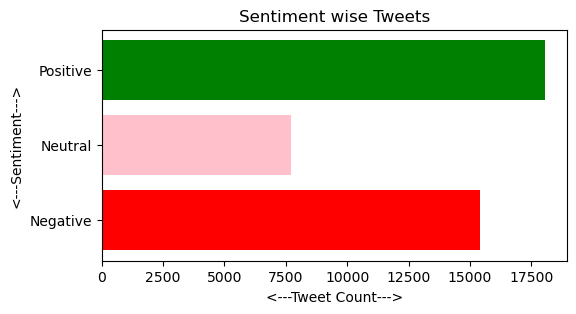

In [15]:
senti=df['Sentiment'].value_counts()
plt.subplots(figsize=(6,3))
plt.barh(senti.index, senti.values, color=['green','red','pink'])
plt.yticks(senti.index, ['Positive', 'Negative', 'Neutral'])
plt.title('Sentiment wise Tweets')
plt.ylabel('<---Sentiment--->')
plt.xlabel('<---Tweet Count--->')
plt.show()

# ***Text Normalization***
**(Stemming)**

In [16]:
# function for stemming:
def stemming(x):
    import nltk
    nltk.download('punkt')
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize

    def stem_func(text):
        stemmer=PorterStemmer()
        tok=word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in tok])
    
    x=x.apply(stem_func)
    return x

In [17]:
stem_df=df.copy()
stem_df['OriginalTweet']=stemming(stem_df['OriginalTweet'])
stem_df

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


,OriginalTweet,Sentiment
0,and and,0
1,advic talk to your neighbour famili to exchang...,1
2,coronaviru australia woolworth to give elderli...,1
3,my food stock is not the onli one which is emp...,1
4,me readi to go at supermarket dure the outbrea...,-1
...,...,...
41152,airlin pilot offer to stock supermarket shelv ...,0
41153,respons to complaint not provid cite covid rel...,-1
41154,you know it s get tough when is ration toilet ...,1
41155,is it wrong that the smell of hand sanit is st...,0


# ***Removing Stopwords***

In [18]:
# function for removing stopwords:
def remove_stopwords(x):
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords')
    from nltk.tokenize import word_tokenize
    
    def func(text):
        stop_words = set(stopwords.words('english'))
        tok=word_tokenize(text)
        return ' '.join([word for word in tok if word not in stop_words])
    
    x=x.apply(func)
    return x

In [19]:
stem_clean_df=stem_df.copy()
stem_clean_df['OriginalTweet']=remove_stopwords(stem_clean_df['OriginalTweet'])
stem_clean_df

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


,OriginalTweet,Sentiment
0,,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronaviru australia woolworth give elderli di...,1
3,food stock onli one empti pleas panic enough f...,1
4,readi go supermarket dure outbreak becaus para...,-1
...,...,...
41152,airlin pilot offer stock supermarket shelv loc...,0
41153,respons complaint provid cite covid relat dela...,-1
41154,know get tough ration toilet paper martinsvil ...,1
41155,wrong smell hand sanit start turn,0


# ***Blank Sentences Removal***

In [20]:
# function for removing blank sentences:
def remove_blank(df):
    idx=df.loc[df.OriginalTweet==''].index
    df.drop(idx,inplace=True)
    df=df.reset_index()
    return df

In [21]:
stem_clean_df=remove_blank(stem_clean_df)
stem_clean_df

,index,OriginalTweet,Sentiment
0,1,advic talk neighbour famili exchang phone numb...,1
1,2,coronaviru australia woolworth give elderli di...,1
2,3,food stock onli one empti pleas panic enough f...,1
3,4,readi go supermarket dure outbreak becaus para...,-1
4,5,news region first confirm covid case came sull...,1
...,...,...,...
41106,41152,airlin pilot offer stock supermarket shelv loc...,0
41107,41153,respons complaint provid cite covid relat dela...,-1
41108,41154,know get tough ration toilet paper martinsvil ...,1
41109,41155,wrong smell hand sanit start turn,0


# ***Train-Test split***

In [22]:
# function to apply train-test split:
def tts(x,y):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    return x_train,x_test,y_train,y_test

In [23]:
# applying train-test split on lemma_clean_df:
x_train, x_test, y_train, y_test = tts(stem_clean_df.OriginalTweet, stem_clean_df.Sentiment)

# ***Vectorization***
***TF-IDF Vectorization***

In [24]:
# function for vectorization:
def vectorize(x_train, x_text):
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vector = TfidfVectorizer(stop_words='english')
    tfidf_x_train = tfidf_vector.fit_transform(x_train.values)
    tfidf_x_test = tfidf_vector.transform(x_test.values)
    return tfidf_x_train, tfidf_x_test, tfidf_vector

# function for vectorizing random data:
def vec(x,vect):
    x_vec = vect.transform(x.values)
    return x_vec

In [25]:
# vectorizing lemmatized data:
x_train_vec, x_test_vec, vector = vectorize(x_train, x_test)

# ***Hyperparameter Tuning and Model Selection***
***Using GridSearchCV***

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import time

In [27]:
# function for fitting tuning and result generation:

def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(),{'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2'],
                                                    'solver': ['liblinear', 'newton-cg', 'sag']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7]}),
        'Naive Bayes':(MultinomialNB(),{'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True,False]}),
        'SVM':(LinearSVC(),{'C': [0.1, 1.0, 10.0], 'penalty':['l1','l2']}),
        'Decision Tree':(DecisionTreeClassifier(),{'criterion': ['gini','entropy'], 'splitter':['best','random']})
    }
    
    results=[]
    
    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)
        
        print(f"Tuning for {name}")
        
        st=time.time()
        
        grid.fit(x_train,y_train) # fitting in GridSearchCV
        y_pred=grid.predict(x_test) # predicts using best hyperparameters
        acc=accuracy_score(y_test,y_pred) # best accuracy obtained
        
        en=time.time()
        
        net_time=en-st
        
        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")
        
        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()
    
    result_df=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    result_df=result_df.style.highlight_max(subset=['best_test_score'], color = 'green')
    result_df=result_df.highlight_min(subset=['best_test_score'], color = 'red')
    result_df=result_df.highlight_max(subset=['running_time'], color = 'red')
    result_df=result_df.highlight_min(subset=['running_time'], color = 'green')
    return result_df


In [28]:
result_df=result_grid(x_train_vec,y_train,x_test_vec,y_test)
result_df

Tuning for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best obtined score for Logistic Regression: 82.249%
Running time for Logistic Regression:80.899s
----------------------------------------------------------------------------------------------------

Tuning for KNN
Best hyperparameters for KNN: {'n_neighbors': 3}
Best obtined score for KNN: 23.851%
Running time for KNN:427.149s
----------------------------------------------------------------------------------------------------

Tuning for Naive Bayes
Best hyperparameters for Naive Bayes: {'alpha': 1.0, 'fit_prior': False}
Best obtined score for Naive Bayes: 68.089%
Running time for Naive Bayes:0.537s
----------------------------------------------------------------------------------------------------

Tuning for SVM
Best hyperparameters for SVM: {'C': 1.0, 'penalty': 'l2'}
Best obtined score for SVM: 79.892%
Running time for SVM:25.881s
-------------------------

,model_name,best_parameters,best_test_score,running_time
0,Logistic Regression,"{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}",82.248850,80.898613
1,KNN,{'n_neighbors': 3},23.850656,427.148918
2,Naive Bayes,"{'alpha': 1.0, 'fit_prior': False}",68.088684,0.537344
3,SVM,"{'C': 1.0, 'penalty': 'l2'}",79.892369,25.880633
4,Decision Tree,"{'criterion': 'gini', 'splitter': 'random'}",65.847727,255.903737


# ***Summary***

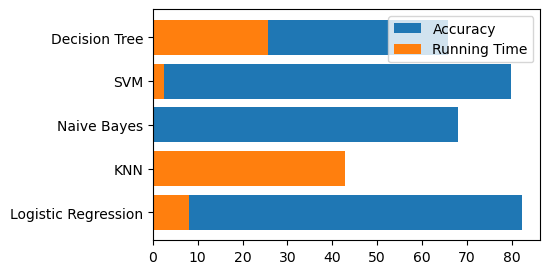

In [29]:
final_df=result_df.data
plt.subplots(figsize=(5,3))
plt.barh(final_df.model_name, final_df.best_test_score, label='Accuracy')
plt.barh(final_df.model_name, final_df.running_time/10, label='Running Time')
plt.legend()
plt.show()

# ***Final Results:***

In [30]:
print(f"Best accuracy achieved: {final_df['best_test_score'].max():.3f} % : {final_df.loc[final_df['best_test_score']==final_df['best_test_score'].max()]['model_name'].tolist()[0]}")
print(f"Best Running time achieved: {final_df['running_time'].min():.3f} s : {final_df.loc[final_df['running_time']==final_df['running_time'].min()]['model_name'].tolist()[0]}")
print()
print(f"Worst Accuracy: {final_df['best_test_score'].min():.3f} % : {final_df.loc[final_df['best_test_score']==final_df['best_test_score'].min()]['model_name'].tolist()[0]}")
print(f"Worst Running time: {final_df['running_time'].max():.3f} s : {final_df.loc[final_df['running_time']==final_df['running_time'].max()]['model_name'].tolist()[0]}")

Best accuracy achieved: 82.249 % : Logistic Regression
Best Running time achieved: 0.537 s : Naive Bayes

Worst Accuracy: 23.851 % : KNN
Worst Running time: 427.149 s : KNN


***Logistic Regression performed best for our data.***

# ***Saving Model and Vectorizer:***

In [31]:
best_clf=LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
best_clf.fit(x_train_vec,y_train)

# using joblib to save model and vectorizer as binary files:
from joblib import dump, load

with open('saved_model','wb') as f:
    dump(best_clf,f)

with open('vectorizer','wb') as v:
    dump(vector,v)

# ***Saving preprocessing pipeline:***

In [32]:
def nlp(x):
    # required libraries:
    import re
    import nltk
    nltk.download('punkt')
    nltk.download('stopwords')
    from nltk.stem import PorterStemmer
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    # helper functions:
    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    def remove_mentions(text): return re.sub(r'@\w*', ' ' , text)
    def remove_urls(text): return re.sub(r'https?://\S+', ' ', text)
    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    def remove_numbers(text): return re.sub(r'[\d]', ' ', text)
    def remove_formatting_symbols(text): return re.sub(r"[\r\n]+",'',text)
    def remove_escape_characters(text): return re.sub(r"\\",'',text)
    def remove_extra_spaces(text): return re.sub(r"\s{2,}",' ',text)
    def stem_func(text):
        stemmer=PorterStemmer()
        tok=word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in tok])
    def stopword_func(text):
        stop_words = set(stopwords.words('english'))
        tok=word_tokenize(text)
        return ' '.join([word for word in tok if word not in stop_words])
    
    # applying functions:
    x=x.apply(remove_hashtags)
    x=x.apply(remove_mentions)
    x=x.apply(remove_urls)
    x=x.apply(remove_apostrophe)
    x=x.apply(remove_special_chars)
    x=x.apply(remove_numbers)
    x=x.apply(remove_formatting_symbols)
    x=x.apply(remove_escape_characters)
    x=x.apply(remove_extra_spaces)
    x=x.str.lower()
    x=x.apply(stem_func)
    x=x.apply(stopword_func)
    return x

with open('nlp','wb') as f:
    dump(nlp,f)

# ***Testing***

In [33]:
df=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [34]:
# preprocessing pipeline:
df=feature_reduction(df)
df=remove_nulls(df)
df=label_preprocessing(df)
original_text=df['OriginalTweet']

nlp_func=load(open('nlp','rb'))
df['OriginalTweet']=nlp_func(df['OriginalTweet'])
df

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


,OriginalTweet,Sentiment
0,trend new yorker encount empti supermarket she...,-1
1,find hand sanit fred meyer turn pack purel che...,1
2,find protect love one,1
3,buy hit citi anxiou shopper stock food amp med...,-1
4,one week everyon buy babi milk powder next eve...,0
...,...,...
3793,meanwhil supermarket israel peopl danc sing to...,1
3794,panic buy lot non perish item echo need food d...,-1
3795,asst prof econom wa talk recent research coron...,0
3796,gov need someth instead biar je rakyat assum l...,-1


In [35]:
# loading vectorizer and saved model:
vector=load(open('vectorizer','rb'))
clf=load(open('saved_model','rb'))

In [36]:
# Vectorizing data:
X=df['OriginalTweet']
Y=df['Sentiment']
x_vec=vector.transform(X)

# generating predictions:
pred=clf.predict(x_vec)
pred=pd.Series(pred)

print(f"Accuracy: {accuracy_score(Y,pred)*100:.3f}%")

Accuracy: 82.175%


In [37]:
# results:
res=pd.concat((original_text,Y,pred), axis=1, keys=['text','actual_sentiment','predicted_sentiment'])
res.head()

,text,actual_sentiment,predicted_sentiment
0,TRENDING: New Yorkers encounter empty supermar...,-1,-1
1,When I couldn't find hand sanitizer at Fred Me...,1,1
2,Find out how you can protect yourself and love...,1,1
3,#Panic buying hits #NewYork City as anxious sh...,-1,-1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0,0


# ***Testing on Randomly Generated Data (Unlabelled):***

In [38]:
# generating random data:
# (can also take user inputs)
str1 = "This pandemic is killing everyone."
str2 = "I am glad that we are still safe. #survived #grateful"
str3 = "Too much negativity!"
str4 = "@god, I believe in you."
str5 = "I will submit my assignment tomorrow."
data=[]
data.append(str1)
data.append(str2)
data.append(str3)
data.append(str4)
data.append(str5)

data=pd.Series(data)
data

0                   This pandemic is killing everyone.
1    I am glad that we are still safe. #survived #g...
2                                 Too much negativity!
3                              @god, I believe in you.
4                I will submit my assignment tomorrow.
dtype: object

In [39]:
from joblib import load, dump
# preprocessing pipeline:
nlp_func=load(open('nlp','rb'))   # Loading saved preprocessing function 
data_fit=data.copy()              # making a copy of original input
data_fit=nlp_func(data_fit)       # applying preprocessing

# vectorization:
vectorizer=load(open('vectorizer','rb'))  # loading saved vectorizer
data_vec=vectorizer.transform(data_fit)   # applying vectorization

# fitting in pre-trained (saved) model:
clf=load(open('saved_model','rb'))  # loading saved model
new_pred=clf.predict(data_vec)      # generating predictions using saved model
new_pred=pd.Series(new_pred)

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [40]:
# label map (optional):
label_map={
    -1:'Negative',
    0:'Neutral',
    1:'Positive'
}
new_pred=new_pred.map(label_map)

In [41]:
# displaying results:
res=pd.concat((data,data_fit,new_pred),axis=1, keys=['original_text', 'processed_text','PredictedSentiment'])
res

,original_text,processed_text,PredictedSentiment
0,This pandemic is killing everyone.,thi pandem kill everyon,Negative
1,I am glad that we are still safe. #survived #g...,glad still safe,Positive
2,Too much negativity!,much neg,Negative
3,"@god, I believe in you.",believ,Negative
4,I will submit my assignment tomorrow.,submit assign tomorrow,Neutral
